# Parkisons Disease Detection using Machine Learning

In [1]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier

from IPython.display import display



In [2]:
import pandas as pd
url_string = 'https://raw.githubusercontent.com/Bishwaprotapi/Parkinson-s-DiseaseML/main/PDdatasetN.csv'


In [3]:
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
  data_file.write(url_content)

In [4]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv('data.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,...,0.065450,0.022110,21.033000,1.000000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,...,0.094030,0.019290,19.085000,1.000000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,...,0.082700,0.013090,20.651000,1.000000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,...,0.087710,0.013530,20.644000,1.000000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,...,0.104700,0.017670,19.649000,1.000000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,synth_7756,151.028206,179.206312,118.797466,0.006594,0.000040,0.003458,0.003513,0.008731,0.027186,...,0.050788,0.021377,21.884979,0.736271,0.499528,0.727604,-5.772439,0.234236,2.392305,0.210778
1191,synth_5355,161.752472,211.299774,114.784598,0.006397,0.000045,0.003545,0.003017,0.009591,0.028982,...,0.049785,0.020925,21.973752,0.798377,0.499209,0.728558,-5.604039,0.235680,2.362850,0.209570
1192,synth_6356,148.323186,194.399282,118.570170,0.006335,0.000044,0.003483,0.003386,0.008980,0.029598,...,0.051215,0.021530,21.615298,0.771907,0.497459,0.717687,-5.770640,0.233789,2.410545,0.223595
1193,synth_7098,152.106305,209.880095,112.903699,0.005298,0.000041,0.002778,0.003506,0.009388,0.029550,...,0.049023,0.026806,21.561977,0.704315,0.486495,0.722529,-5.677169,0.236918,2.427505,0.218734


# Data Preprocessing


---
 The following steps are performed on the dataset in this section:
 + Dropping Redudant Columns
 + Checking For Duplicated Rows
 + Checking For Missing Values

In [5]:
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1.0,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1.0,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1.0,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1.0,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1.0,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [6]:
df.tail(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1185,synth_3736,154.210858,195.680246,114.915205,0.006021,0.000044,0.003012,0.003701,0.009962,0.026708,...,0.048029,0.023841,21.759378,0.805478,0.500839,0.724165,-5.753489,0.227133,2.368670,0.204189
1186,synth_4562,155.465075,182.597360,115.723500,0.006234,0.000049,0.002985,0.003535,0.008918,0.030656,...,0.046421,0.027026,21.593629,0.779830,0.511668,0.712801,-5.688908,0.219712,2.422847,0.227081
1187,synth_7845,157.263668,205.483625,106.477723,0.006141,0.000045,0.003022,0.003350,0.009994,0.029575,...,0.046535,0.019110,21.801997,0.711164,0.501833,0.724977,-5.568519,0.225449,2.415315,0.200452
1188,synth_4486,161.347106,195.567784,120.282318,0.006510,0.000051,0.002627,0.003469,0.010124,0.029358,...,0.046203,0.018616,22.219178,0.741540,0.500891,0.719020,-5.753104,0.227673,2.395995,0.210832
1189,synth_7170,160.358805,185.880356,120.173617,0.006293,0.000042,0.002982,0.003554,0.010926,0.028272,...,0.049394,0.029593,22.297053,0.766110,0.496772,0.721537,-5.693589,0.219365,2.356876,0.204522
1190,synth_7756,151.028206,179.206312,118.797466,0.006594,0.000040,0.003458,0.003513,0.008731,0.027186,...,0.050788,0.021377,21.884979,0.736271,0.499528,0.727604,-5.772439,0.234236,2.392305,0.210778
1191,synth_5355,161.752472,211.299774,114.784598,0.006397,0.000045,0.003545,0.003017,0.009591,0.028982,...,0.049785,0.020925,21.973752,0.798377,0.499209,0.728558,-5.604039,0.235680,2.362850,0.209570
1192,synth_6356,148.323186,194.399282,118.570170,0.006335,0.000044,0.003483,0.003386,0.008980,0.029598,...,0.051215,0.021530,21.615298,0.771907,0.497459,0.717687,-5.770640,0.233789,2.410545,0.223595
1193,synth_7098,152.106305,209.880095,112.903699,0.005298,0.000041,0.002778,0.003506,0.009388,0.029550,...,0.049023,0.026806,21.561977,0.704315,0.486495,0.722529,-5.677169,0.236918,2.427505,0.218734
1194,synth_1997,151.964173,211.553642,120.752900,0.005573,0.000040,0.003039,0.002910,0.011217,0.031296,...,0.049004,0.020198,21.637952,0.735387,0.508520,0.720055,-5.884754,0.228012,2.395277,0.197326


In [7]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  1195


In [8]:
# Dropping The Name Column
df.drop(['name'], axis=1, inplace=True)
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,...,0.065450,0.022110,21.033000,1.000000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,...,0.094030,0.019290,19.085000,1.000000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,...,0.082700,0.013090,20.651000,1.000000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,...,0.087710,0.013530,20.644000,1.000000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,...,0.104700,0.017670,19.649000,1.000000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,151.028206,179.206312,118.797466,0.006594,0.000040,0.003458,0.003513,0.008731,0.027186,0.265100,...,0.050788,0.021377,21.884979,0.736271,0.499528,0.727604,-5.772439,0.234236,2.392305,0.210778
1191,161.752472,211.299774,114.784598,0.006397,0.000045,0.003545,0.003017,0.009591,0.028982,0.301784,...,0.049785,0.020925,21.973752,0.798377,0.499209,0.728558,-5.604039,0.235680,2.362850,0.209570
1192,148.323186,194.399282,118.570170,0.006335,0.000044,0.003483,0.003386,0.008980,0.029598,0.290663,...,0.051215,0.021530,21.615298,0.771907,0.497459,0.717687,-5.770640,0.233789,2.410545,0.223595
1193,152.106305,209.880095,112.903699,0.005298,0.000041,0.002778,0.003506,0.009388,0.029550,0.289629,...,0.049023,0.026806,21.561977,0.704315,0.486495,0.722529,-5.677169,0.236918,2.427505,0.218734


In [9]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 23
Number of Instances In Dataset :  1195


In [10]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,...,0.065450,0.022110,21.033000,1.000000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,...,0.094030,0.019290,19.085000,1.000000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,...,0.082700,0.013090,20.651000,1.000000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,...,0.087710,0.013530,20.644000,1.000000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,...,0.104700,0.017670,19.649000,1.000000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,151.028206,179.206312,118.797466,0.006594,0.000040,0.003458,0.003513,0.008731,0.027186,0.265100,...,0.050788,0.021377,21.884979,0.736271,0.499528,0.727604,-5.772439,0.234236,2.392305,0.210778
1191,161.752472,211.299774,114.784598,0.006397,0.000045,0.003545,0.003017,0.009591,0.028982,0.301784,...,0.049785,0.020925,21.973752,0.798377,0.499209,0.728558,-5.604039,0.235680,2.362850,0.209570
1192,148.323186,194.399282,118.570170,0.006335,0.000044,0.003483,0.003386,0.008980,0.029598,0.290663,...,0.051215,0.021530,21.615298,0.771907,0.497459,0.717687,-5.770640,0.233789,2.410545,0.223595
1193,152.106305,209.880095,112.903699,0.005298,0.000041,0.002778,0.003506,0.009388,0.029550,0.289629,...,0.049023,0.026806,21.561977,0.704315,0.486495,0.722529,-5.677169,0.236918,2.427505,0.218734


In [11]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       1195 non-null   float64
 1   MDVP:Fhi(Hz)      1195 non-null   float64
 2   MDVP:Flo(Hz)      1195 non-null   float64
 3   MDVP:Jitter(%)    1195 non-null   float64
 4   MDVP:Jitter(Abs)  1195 non-null   float64
 5   MDVP:RAP          1195 non-null   float64
 6   MDVP:PPQ          1195 non-null   float64
 7   Jitter:DDP        1195 non-null   float64
 8   MDVP:Shimmer      1195 non-null   float64
 9   MDVP:Shimmer(dB)  1195 non-null   float64
 10  Shimmer:APQ3      1195 non-null   float64
 11  Shimmer:APQ5      1195 non-null   float64
 12  MDVP:APQ          1195 non-null   float64
 13  Shimmer:DDA       1195 non-null   float64
 14  NHR               1195 non-null   float64
 15  HNR               1195 non-null   float64
 16  status            1195 non-null   float64


In [12]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,...,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,154.312848,197.246916,116.332971,0.006221,0.000044,0.003306,0.003428,0.009920,0.029671,0.282587,...,0.047084,0.024880,21.895992,0.754117,0.498054,0.718214,-5.683541,0.226451,2.382126,0.206771
std,17.124313,37.804828,17.953210,0.002001,0.000014,0.001228,0.001140,0.003678,0.007781,0.080554,...,0.012609,0.016717,1.829752,0.178176,0.043021,0.022905,0.451130,0.034527,0.157783,0.037229
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,150.616420,189.666263,112.204966,0.005769,0.000041,0.003012,0.003173,0.009089,0.027992,0.264388,...,0.044325,0.020837,21.550002,0.726172,0.489091,0.713742,-5.779205,0.219263,2.351569,0.199061
50%,154.117666,197.198334,116.100612,0.006188,0.000044,0.003282,0.003397,0.009845,0.029575,0.280555,...,0.046820,0.024486,21.913050,0.758665,0.497781,0.718387,-5.681992,0.226621,2.382482,0.207056
75%,157.491303,204.071906,119.290367,0.006557,0.000046,0.003530,0.003618,0.010552,0.031008,0.296840,...,0.049418,0.027661,22.274815,0.797437,0.506417,0.722957,-5.595197,0.232901,2.411210,0.213564
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [13]:
df['status'] = df['status'].astype('uint8')
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,...,0.065450,0.022110,21.033000,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,...,0.094030,0.019290,19.085000,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,...,0.082700,0.013090,20.651000,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,...,0.087710,0.013530,20.644000,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,...,0.104700,0.017670,19.649000,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,151.028206,179.206312,118.797466,0.006594,0.000040,0.003458,0.003513,0.008731,0.027186,0.265100,...,0.050788,0.021377,21.884979,0,0.499528,0.727604,-5.772439,0.234236,2.392305,0.210778
1191,161.752472,211.299774,114.784598,0.006397,0.000045,0.003545,0.003017,0.009591,0.028982,0.301784,...,0.049785,0.020925,21.973752,0,0.499209,0.728558,-5.604039,0.235680,2.362850,0.209570
1192,148.323186,194.399282,118.570170,0.006335,0.000044,0.003483,0.003386,0.008980,0.029598,0.290663,...,0.051215,0.021530,21.615298,0,0.497459,0.717687,-5.770640,0.233789,2.410545,0.223595
1193,152.106305,209.880095,112.903699,0.005298,0.000041,0.002778,0.003506,0.009388,0.029550,0.289629,...,0.049023,0.026806,21.561977,0,0.486495,0.722529,-5.677169,0.236918,2.427505,0.218734


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       1195 non-null   float64
 1   MDVP:Fhi(Hz)      1195 non-null   float64
 2   MDVP:Flo(Hz)      1195 non-null   float64
 3   MDVP:Jitter(%)    1195 non-null   float64
 4   MDVP:Jitter(Abs)  1195 non-null   float64
 5   MDVP:RAP          1195 non-null   float64
 6   MDVP:PPQ          1195 non-null   float64
 7   Jitter:DDP        1195 non-null   float64
 8   MDVP:Shimmer      1195 non-null   float64
 9   MDVP:Shimmer(dB)  1195 non-null   float64
 10  Shimmer:APQ3      1195 non-null   float64
 11  Shimmer:APQ5      1195 non-null   float64
 12  MDVP:APQ          1195 non-null   float64
 13  Shimmer:DDA       1195 non-null   float64
 14  NHR               1195 non-null   float64
 15  HNR               1195 non-null   float64
 16  status            1195 non-null   uint8  


In [15]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


# The dataset does NOT contain any Duplicated Rows. Hence, no action is required.



In [16]:
# Checking For Missing Values In Dataset
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Another way to check for missing values in the dataset is by using the isnull() method.
### This method returns a DataFrame of the same size as the original DataFrame, with True at the positions of missing values and False at the positions of non-missing values.
### We can then use the sum() method to count the number of missing values in each column.
### If the sum of a column is 0, it means that the column does not contain any missing values.
### Let's use this method to check for missing values in our dataset.

# Exploratry Data Analysis

<Axes: title={'center': 'Balance of Data in Status'}, ylabel='count'>

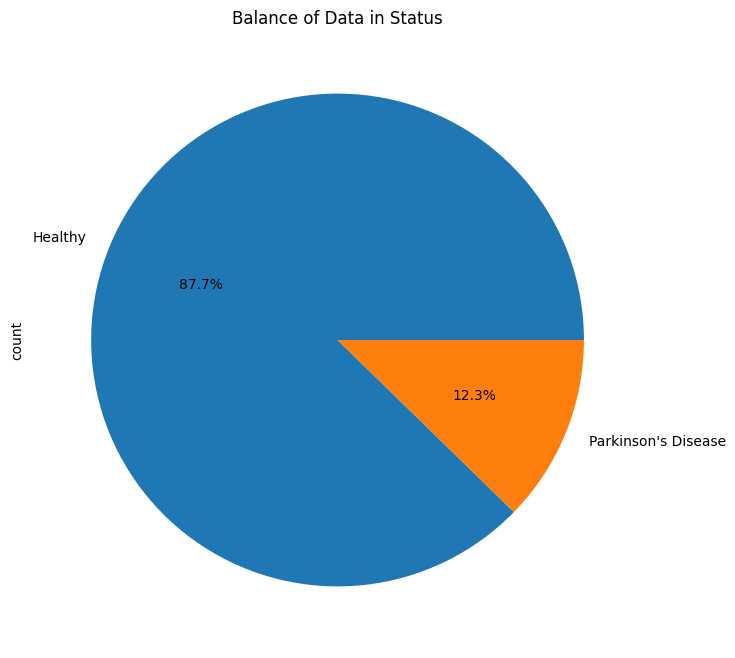

In [17]:
#Balance of Data with More Detail
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Balance of Data in Status', figsize=(10, 8), labels=['Healthy', 'Parkinson\'s Disease'])

<Axes: >

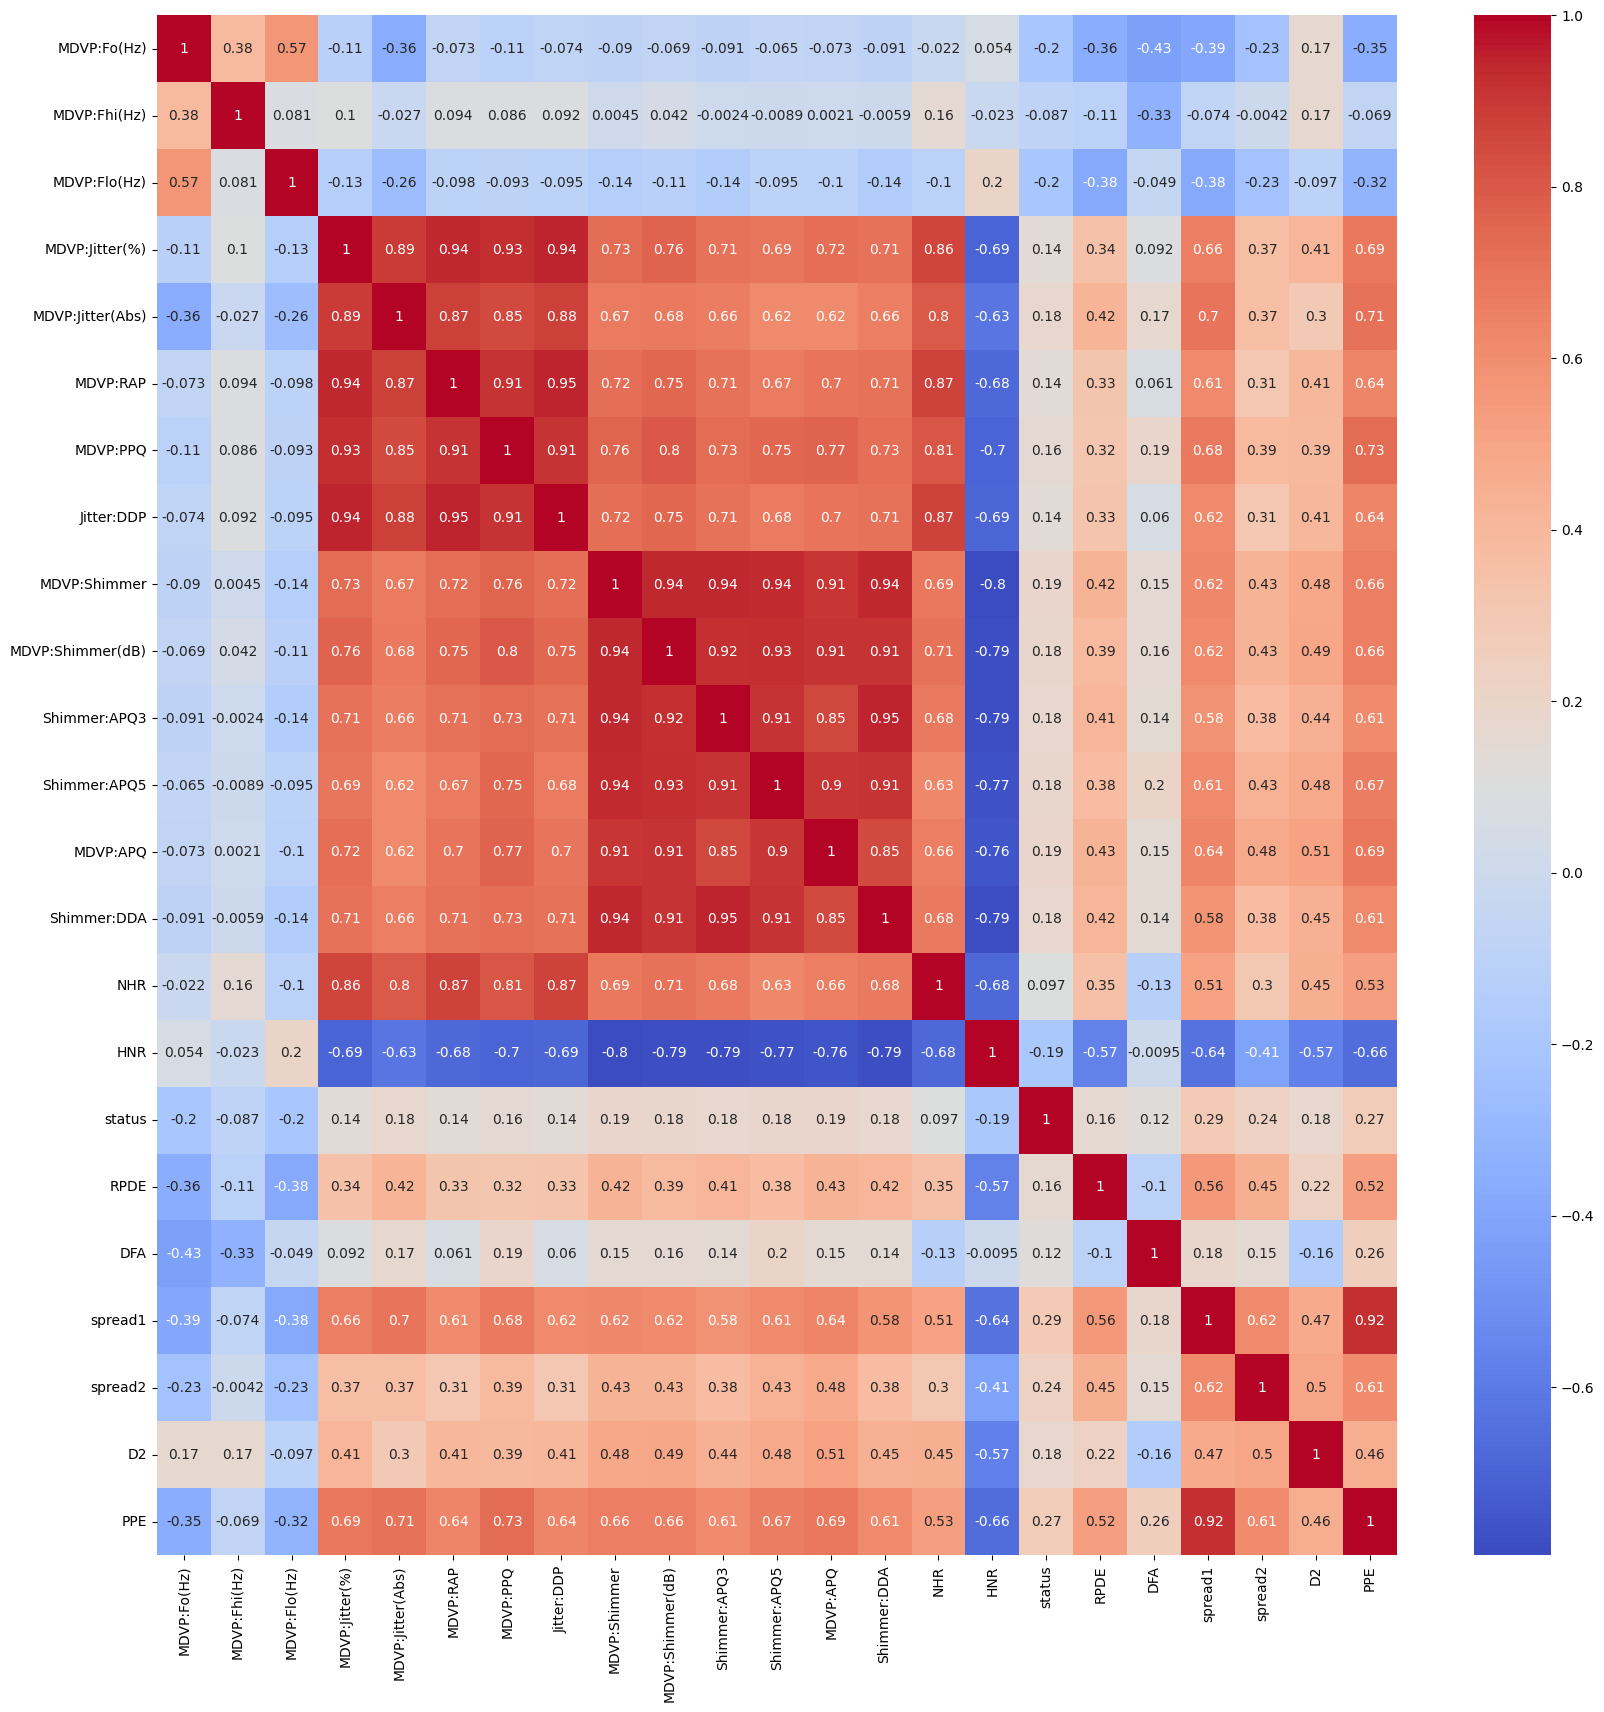

In [18]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df.corr(),annot=True,ax=ax, cmap='coolwarm')

### The correlation heatmap reveals a significant degree of correlation among various independent features. This suggests that these features are not entirely independent and may be related to each other in meaningful ways.

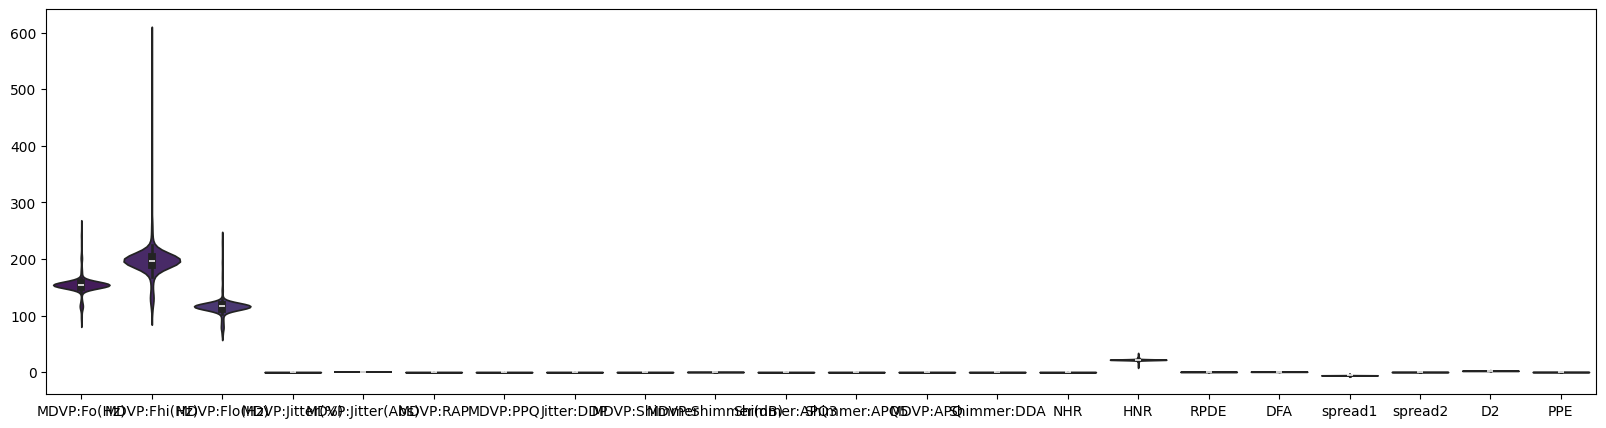

In [19]:
#Violinplot Plot
fig, ax = plt.subplots(figsize=(20, 5))
sns.violinplot(data=df.drop('status', axis=1), palette="viridis", ax=ax)
plt.show()


<Figure size 1500x400 with 0 Axes>

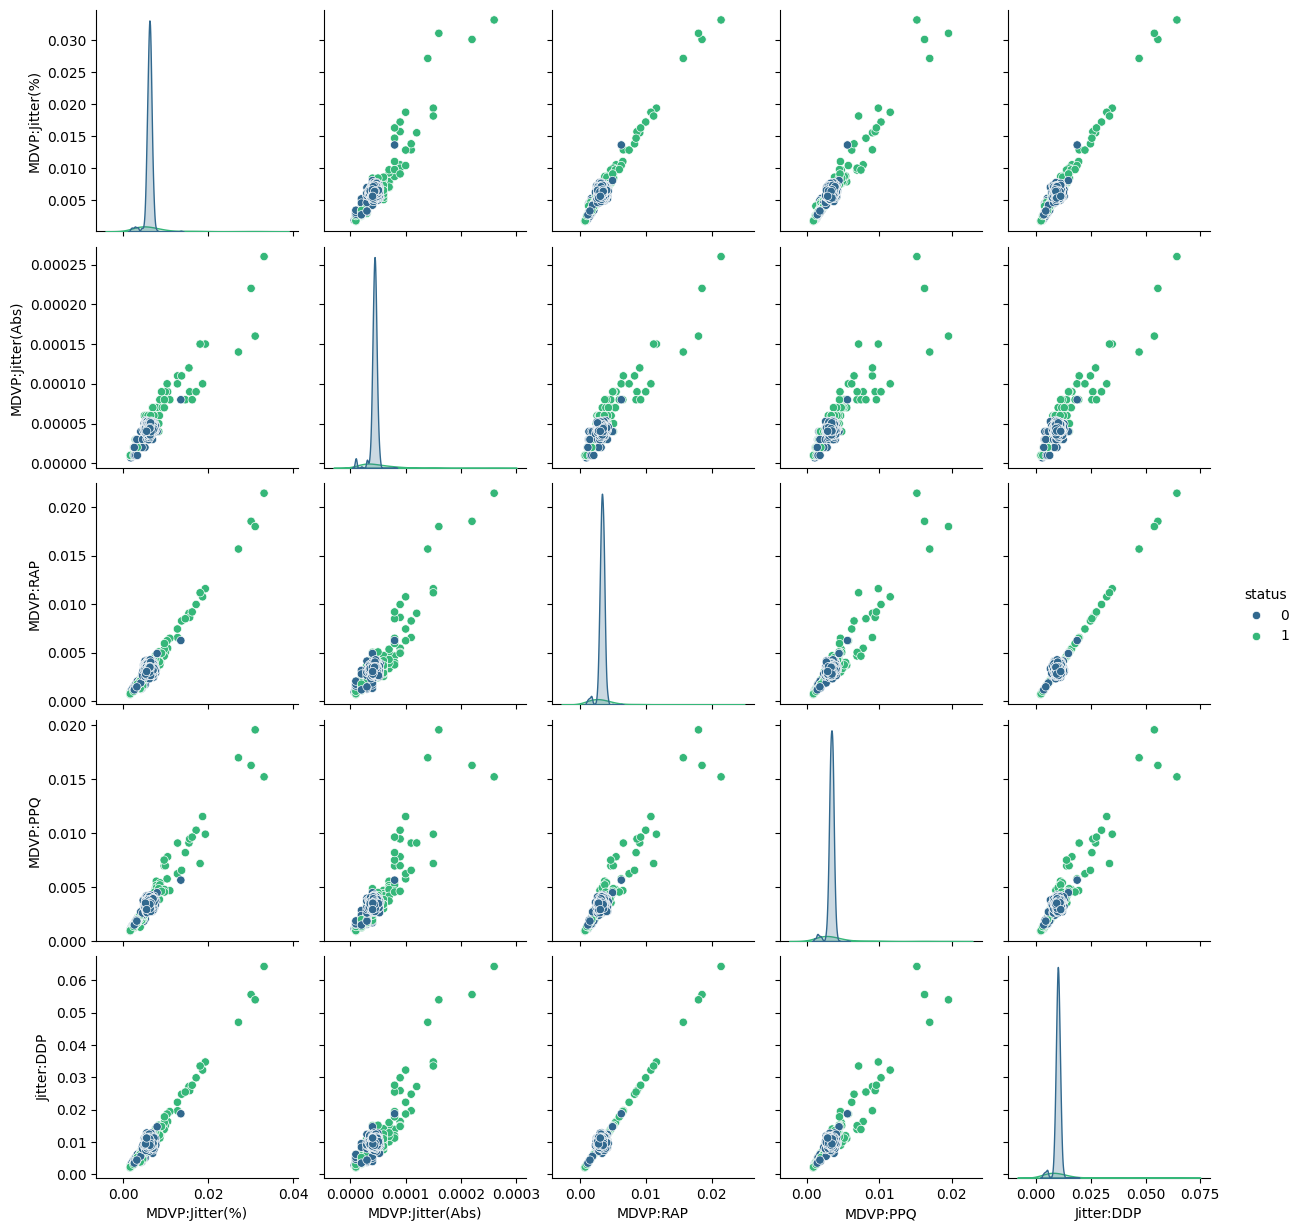

In [20]:
plt.figure(figsize=(15, 4))
sns.pairplot(df, hue='status', vars=['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'], palette="viridis")
plt.show()

### The pair plot reveals a strong correlation among the fundamental frequencies, indicating that they are closely related and may be redundant in predicting Parkinson's disease. This correlation suggests that these frequencies may be capturing similar aspects of the speech patterns, which could be important in identifying the disease.

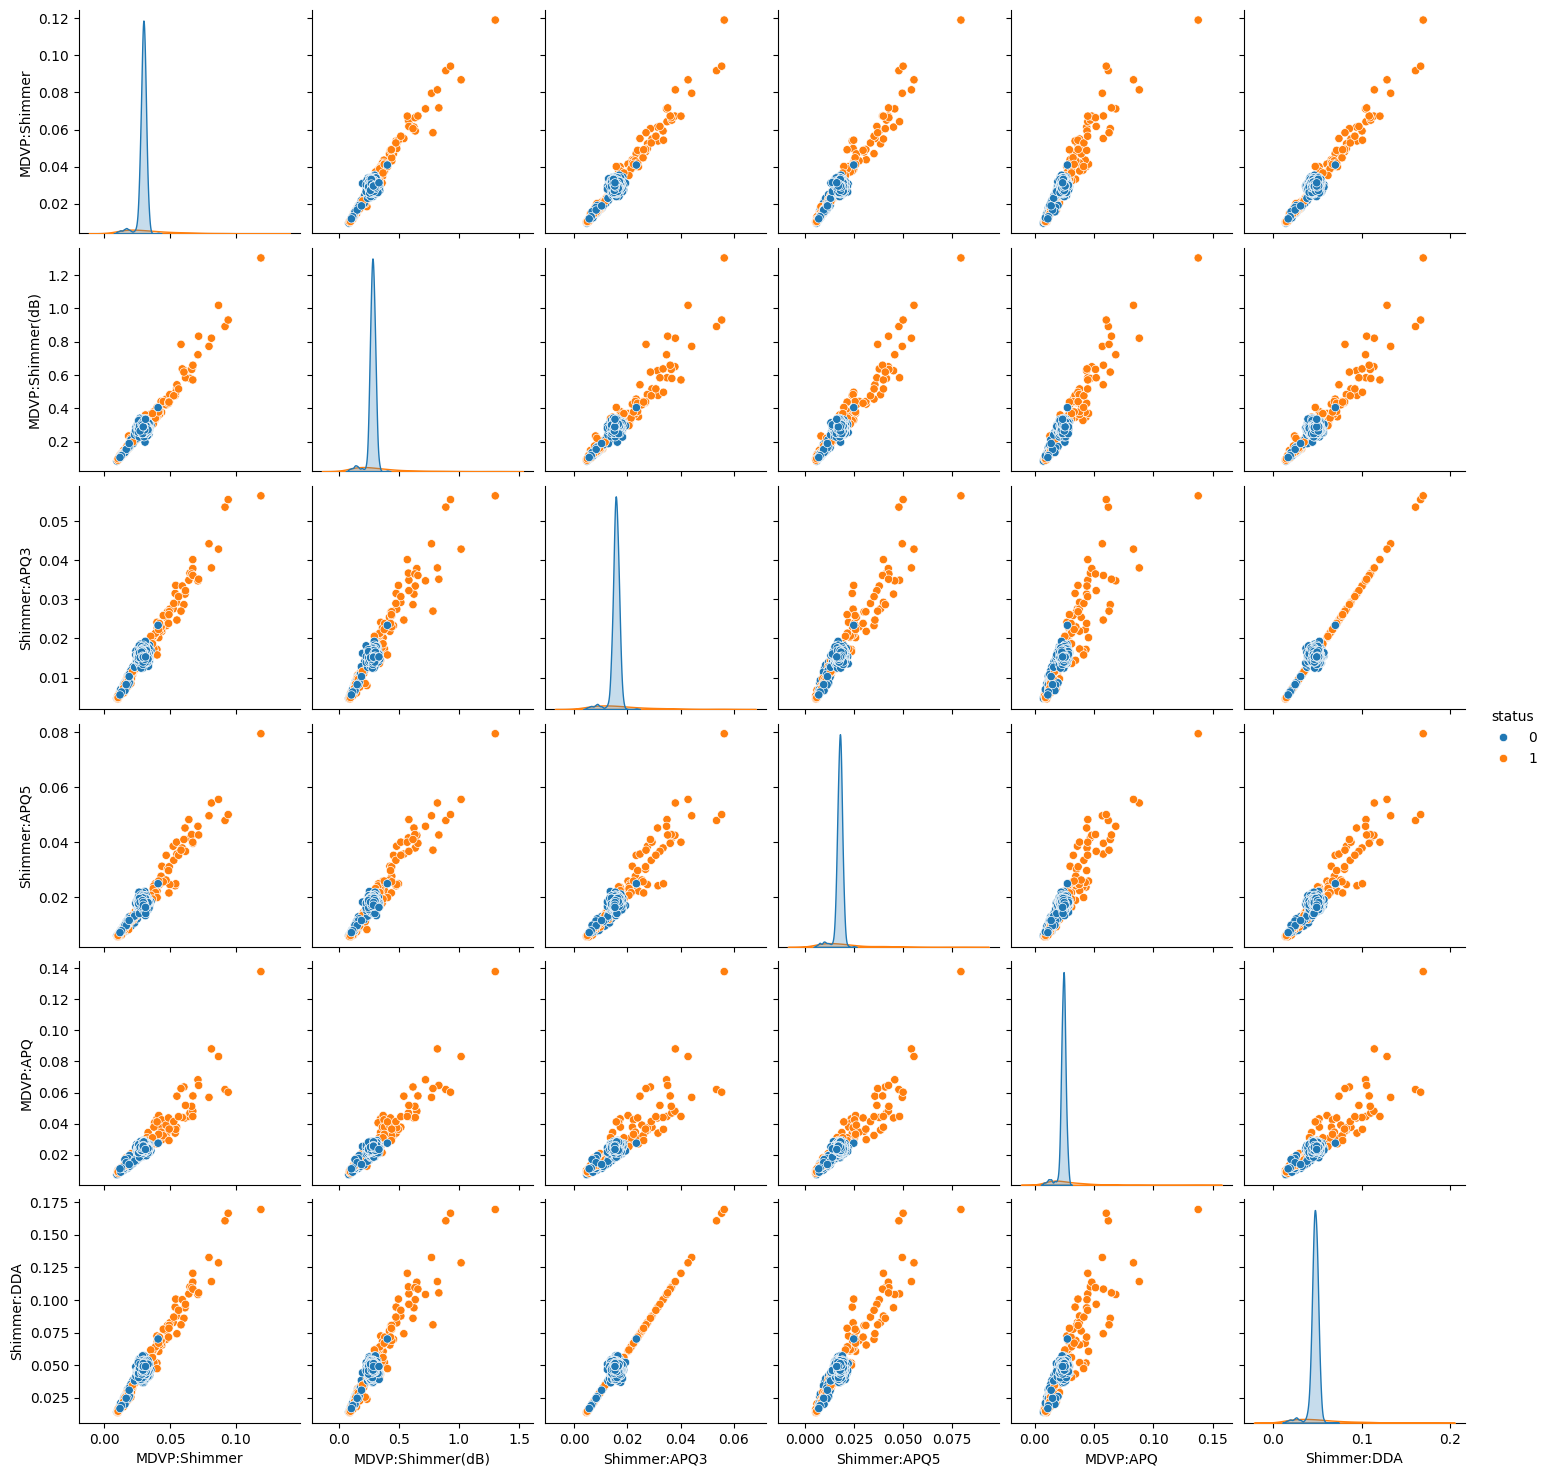

In [21]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

From the above pair plot we can understand that all these measures variation in amplitude are highly correlated with eachother.

#  Balancing Dataset
# ---
### In this section, we address the issue of dataset imbalance, which is a common problem in machine learning where one class has a significantly larger number of instances than the others. In our dataset, we have 147 samples of Parkinson's disease and only 48 samples of non-Parkinson's disease, making it heavily imbalanced. This imbalance can lead to biased models that perform poorly on the minority class.
# 
### To balance the dataset, we employ the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE is a popular oversampling method that generates new minority class samples by interpolating between existing minority class samples. This approach helps to increase the size of the minority class, making the dataset more balanced and reducing the bias towards the majority class.
# 
### By applying SMOTE, we aim to create a more balanced dataset that allows our machine learning models to learn from a more representative distribution of classes. This, in turn, can improve the model's performance on the minority class and increase its overall accuracy.

In [22]:
# Exploring Imabalance In Dataset
df['status'].value_counts()

status
0    1048
1     147
Name: count, dtype: int64

In [23]:
# Extracting Features Into Features & Target
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (1195, 22)
Target (y) Shape Before Balancing : (1195,)


In [24]:
# Intialising SMOTE Object
sm = SMOTE(random_state=300)

In [25]:
# Resampling Data
X, y = sm.fit_resample(X, y)

In [26]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (2096, 22)
Target (y) Shape After Balancing : (2096,)


In [27]:
# Scaling features between -1 and 1  for mormalization 
scaler = MinMaxScaler((-1,1))

In [28]:
# define X_features , Y_labels
X_features = scaler.fit_transform(X)
Y_labels = y

In [29]:
# splitting the dataset into traning and testing sets into 80 - 20
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)

# Machine Learning Model Training
#
In this section, we have trained and evaluated the following Machine Learning Models to predict Parkinson's disease diagnosis:
+ Decision Tree Classifier: This model is simple to implement and interpret, but can be prone to overfitting.
+ Random Forest Classifier: This ensemble model combines multiple decision trees to improve accuracy and reduce overfitting.
+ Logistic Regression: This linear model is suitable for binary classification problems and provides interpretable coefficients.
+ SVM (Support Vector Machine): This model is effective in high-dimensional spaces and can handle non-linear relationships.
+ Naive Bayes: This family of probabilistic models is simple to implement and can handle categorical features.
+ KNN Classifier: This model is based on the idea that similar instances should have similar labels.
+ XGBoost Classifier: This gradient boosting model is known for its high accuracy and speed in handling large datasets.
#
Each model was trained and evaluated using the same dataset to ensure a fair comparison of their performance.

## Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       226
           1       0.98      1.00      0.99       194

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420



In [31]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(30,210,30),
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

c:\Users\USER\Documents\Parkinson-s-DiseaseML\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\Documents\Parkinson-s-DiseaseML\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\Documents\Parkinson-s-DiseaseML\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\USER\Documents\Parkinson-s-DiseaseML\.venv\Lib\site-packages\sklearn\base.py", line 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': range(30, 210, 30)})

In [32]:
CV_dt.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'random_state': 180}

In [33]:
dt1=DecisionTreeClassifier(random_state=120, max_features='sqrt', max_depth=6, criterion='entropy')
dt1.fit(X_train, y_train)
predDT = dt1.predict(X_test) 
print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       226
           1       0.99      0.96      0.97       194

    accuracy                           0.98       420
   macro avg       0.98      0.97      0.98       420
weighted avg       0.98      0.98      0.98       420



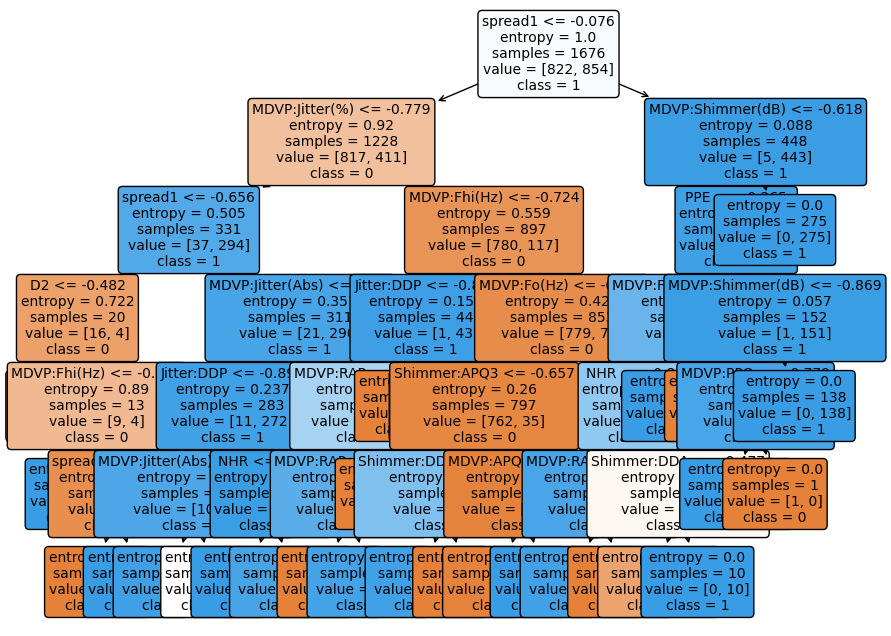

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming feature_cols is a list of feature names defined elsewhere in the notebook
# If feature_cols is not defined, please define it before running this code

# Define feature_cols if it's not already defined
if 'feature_cols' not in locals():
    feature_cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

plt.figure(figsize=(10, 8))
plot_tree(dt1, filled=True, rounded=True, feature_names=feature_cols, class_names=['0', '1'], fontsize=10)
plt.savefig('parkinson_tree.png')
plt.show()


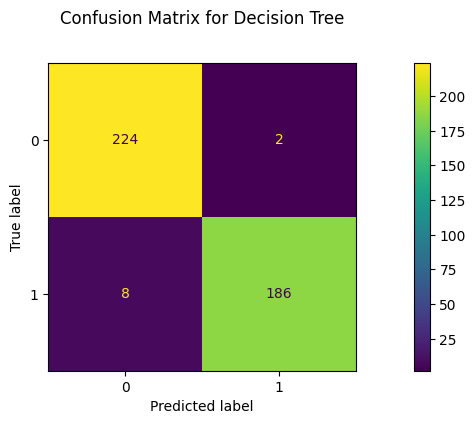

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, dt1.predict(X_test))

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Confusion Matrix for Decision Tree', y=1.1)
plt.show()

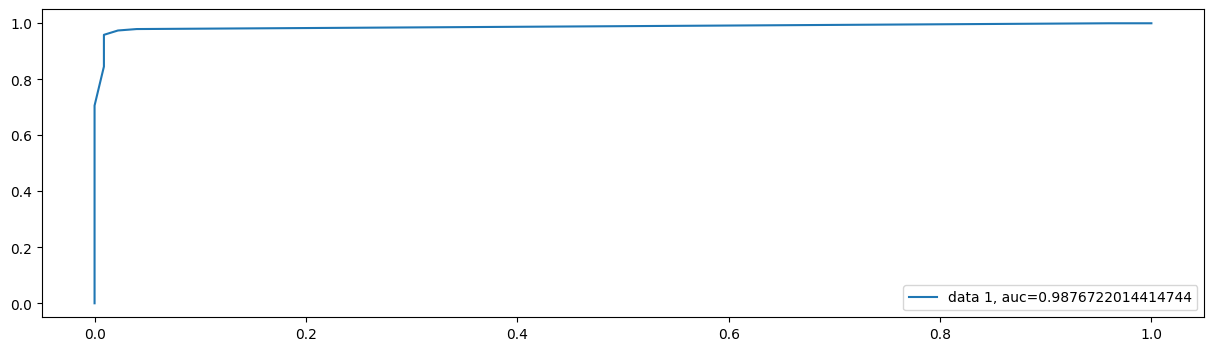

In [36]:
y_pred_proba = dt1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [37]:
import joblib
# Dumping Decision Tree Classifier
joblib.dump(dt1, 'dt_clf.pkl')

['dt_clf.pkl']

## Random Forest Classifier

In [38]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predRF = rfc.predict(X_test)

print(classification_report(y_test, predRF))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       226
           1       0.98      1.00      0.99       194

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420



In [39]:
param_grid = { 
    'n_estimators': range(100,300,25),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(100,250,50),
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

c:\Users\USER\Documents\Parkinson-s-DiseaseML\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\Documents\Parkinson-s-DiseaseML\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\Documents\Parkinson-s-DiseaseML\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\USER\Documents\Parkinson-s-DiseaseML\.venv\Lib\site-packages\sklearn\base.py", lin

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(100, 300, 25),
                         'random_state': range(100, 250, 50)})

In [40]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 250,
 'random_state': 200}

In [41]:
rfc1=RandomForestClassifier(random_state=200, max_features='sqrt', n_estimators= 125, max_depth=7, criterion='entropy')
rfc1.fit(X_train, y_train)
predRFC = rfc1.predict(X_test)
print(classification_report(y_test, predRFC))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       226
           1       0.97      1.00      0.99       194

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420



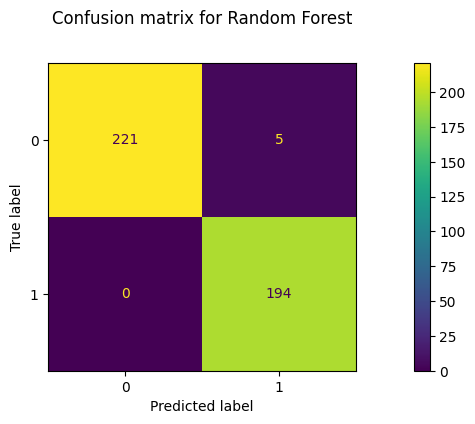

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rfc1.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for Random Forest', y=1.1)
plt.show()

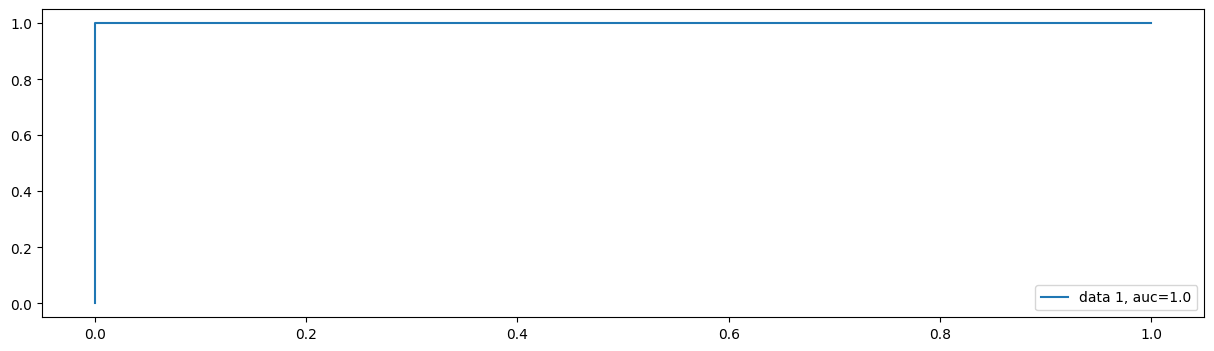

In [43]:
y_pred_proba = rfc1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [44]:
# Dumping Random Forest Classifier
joblib.dump(rfc1, 'rf_clf.pkl')

['rf_clf.pkl']

# Logistic Regression

In [45]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predlog = logmodel.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predlog))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predlog).T)

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       226
           1       0.84      0.65      0.73       194

    accuracy                           0.78       420
   macro avg       0.79      0.77      0.77       420
weighted avg       0.79      0.78      0.78       420

Confusion Matrix:
[[202  68]
 [ 24 126]]


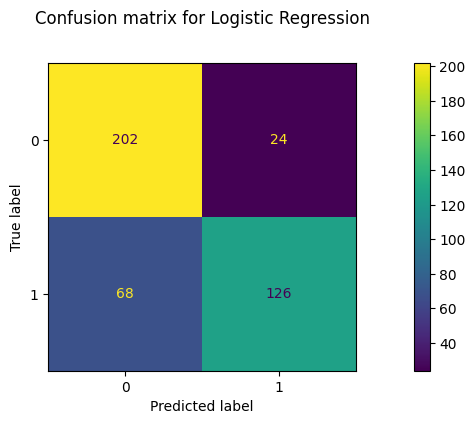

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, predlog)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.show()

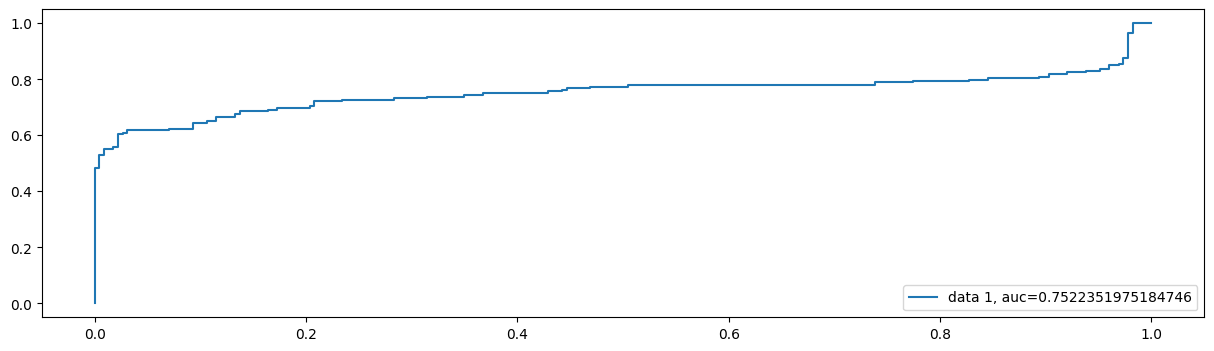

In [48]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [49]:
# Dumping Logistic Regression Model
joblib.dump(logmodel, 'lg_clf.pkl')

['lg_clf.pkl']

# SVM

SVM With Linear Kernel

In [50]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

X_pred = clf.predict(X_train)
print("Train Set Accuracy:",metrics.accuracy_score(y_train, X_pred))

Test Set Accuracy: 0.8047619047619048
Train Set Accuracy: 0.7929594272076372


In [51]:
param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose = 3)
grid_SVC.fit(X_train, y_train)

# print best parameter after tuning 
print("\nBest Parameters: ", grid_SVC.best_params_)

# print how our model looks after hyper-parameter tuning
print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test) 
  
# print classification report 
print("\n", classification_report(y_test, predSVC)) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.724 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.743 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.754 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.733 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.994 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.977 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.991 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.974 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.994 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

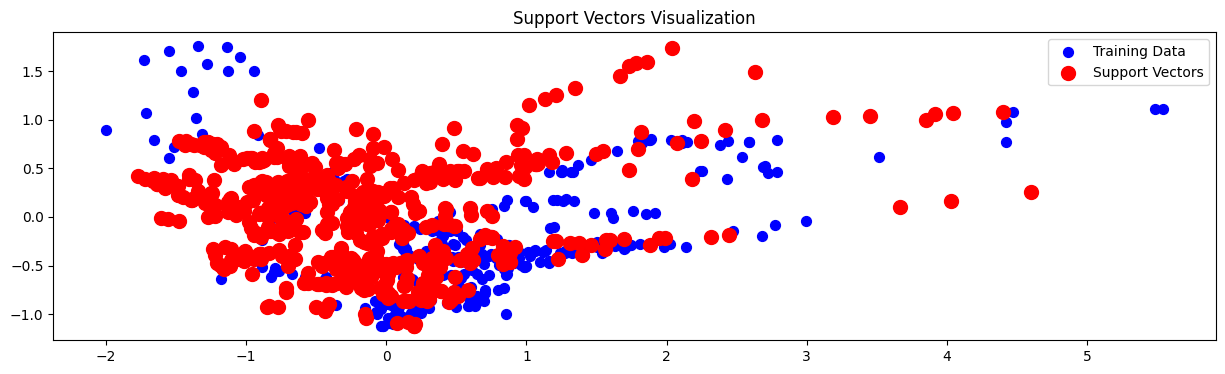

In [52]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_r = pca.fit(X_train).transform(X_train)

# Plot the support vectors
plt.scatter(X_r[:, 0], X_r[:, 1], c='b', s=50, label='Training Data')
plt.scatter(X_r[clf.support_, 0], X_r[clf.support_, 1], c='r', s=100, label='Support Vectors')
plt.legend()
plt.title('Support Vectors Visualization')
plt.show()


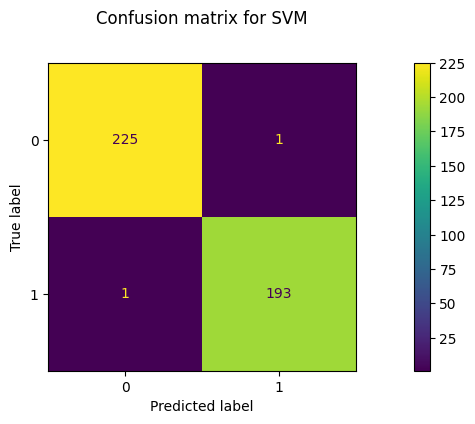

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = grid_SVC.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for SVM', y=1.1)
plt.show()

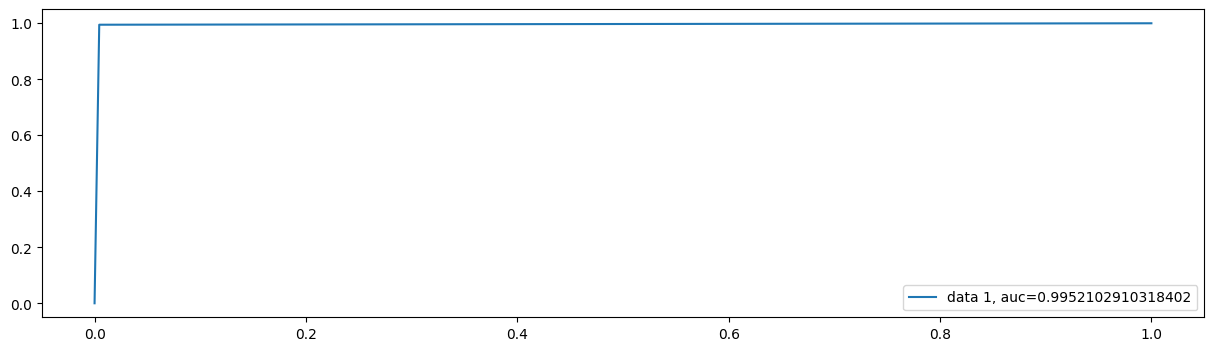

In [54]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predSVC)
auc = metrics.roc_auc_score(y_test, predSVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [55]:
# Dumping SVM Classifier
joblib.dump(grid_SVC, 'svm_clf.pkl')

['svm_clf.pkl']

# Naive Bayes 

In [56]:
# Naive Bayes

gnb = Naive_Bayes()
gnb.fit(X_train, y_train)
predgnb = gnb.predict(X_test)

print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       226
           1       0.95      0.94      0.95       194

    accuracy                           0.95       420
   macro avg       0.95      0.95      0.95       420
weighted avg       0.95      0.95      0.95       420



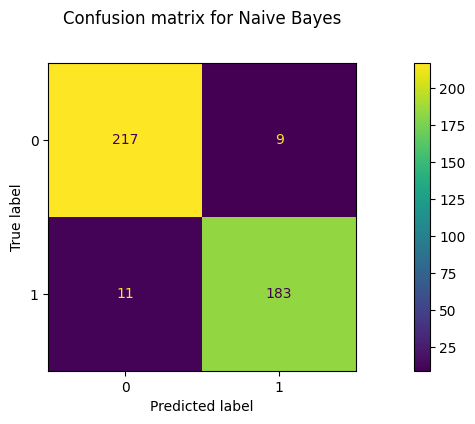

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, predgnb)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.show()

In [58]:
# scores -check how efficiently labels are predicted
accuracy_testing = accuracy_score(y_test, predgnb)
print("Accuracy % :",accuracy_testing*100)

Accuracy % : 95.23809523809523


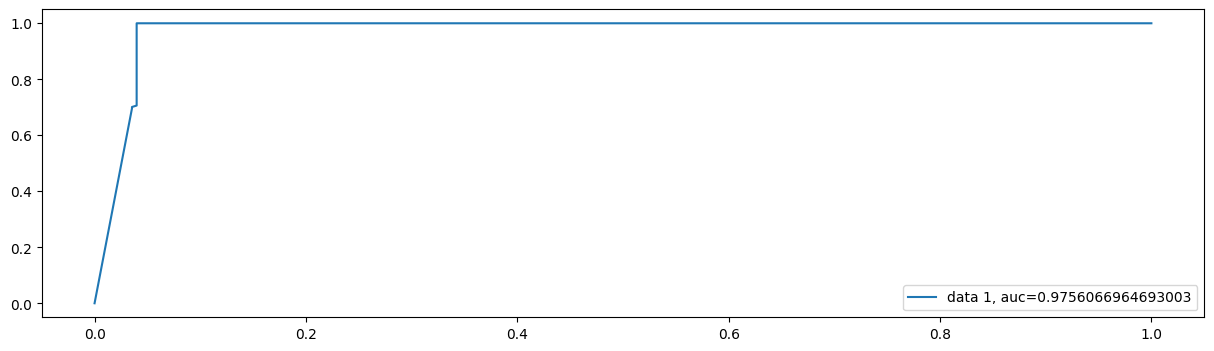

In [59]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [60]:
# Dumping Naive Bayes Classifier
joblib.dump(gnb, 'nb_clf.pkl')

['nb_clf.pkl']

# KNN Classifier

In [61]:
import numpy as np

Ks = 10
mean_acc = []
ConfustionMx = [];
for n in range(2,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_test, yhat))  
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.9928571428571429, 0.9952380952380953, 0.9928571428571429, 0.9904761904761905, 0.9880952380952381, 0.9809523809523809, 0.9785714285714285, 0.9809523809523809]


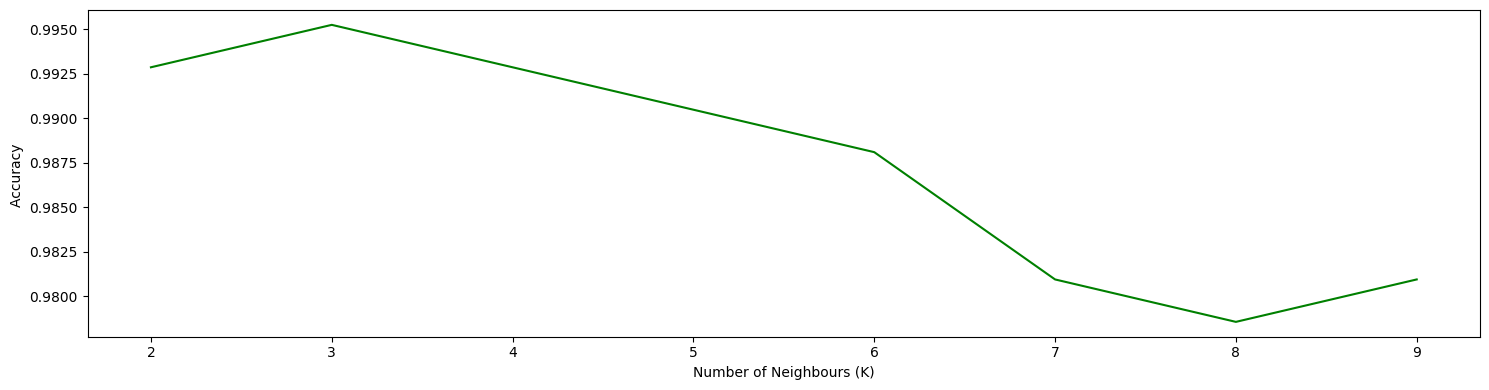

In [62]:
plt.plot(range(2,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predKNN = knn.predict(X_test)
predKNN

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

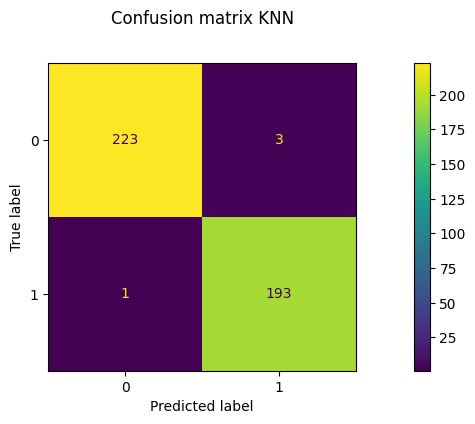

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix KNN', y=1.1)
plt.show()

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

try:
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("KNN Classifier Accuracy: ", accuracy_score(y_test, y_pred))

    # Plotting the KNN Classifier
    plt.figure(figsize=(10, 6))
    if X_test.shape[1] >= 2:
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='True Labels', s=100, cmap='viridis')
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, label='Predicted Labels', s=100, cmap='viridis', alpha=0.5)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    else:
        plt.scatter(X_test[:, 0], np.zeros(X_test.shape[0]), c=y_test, label='True Labels', s=100, cmap='viridis')
        plt.scatter(X_test[:, 0], np.zeros(X_test.shape[0]), c=y_pred, label='Predicted Labels', s=100, cmap='viridis', alpha=0.5)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2 (dummy)')
    plt.title('KNN Classifier')
    plt.legend()
    plt.colorbar()
    plt.show()
except Exception as e:
    print("An error occurred: ", str(e))



KNN Classifier Accuracy:  0.9857142857142858
An error occurred:  (slice(None, None, None), 0)


<Figure size 1000x600 with 0 Axes>

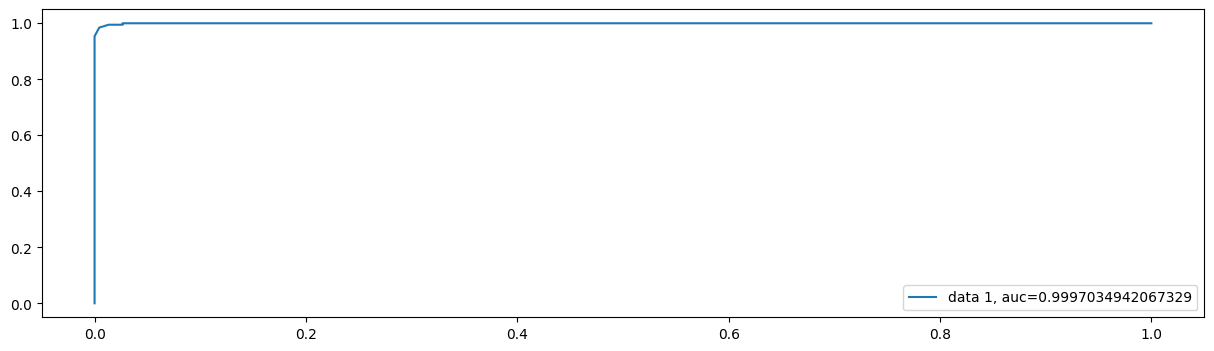

In [65]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [66]:
# Dumping KNN Classifier
joblib.dump(knn, 'knn_clf.pkl')

['knn_clf.pkl']

# XGBoost Classifier
### This section details the training of an XGBoost Classifier for categorizing instances as Parkinson's or not. The optimization of the following XGBoost Classifier parameters is discussed:
+ **Maximum Tree Depth**: Controls the depth of the decision tree.
+ **Learning Rate (ETA)**: Adjusts the step size of each gradient descent update.
+ **L2 Regularization (Lambda)**: Regularizes the weights to prevent overfitting.
+ **Random Seed**: Ensures reproducibility by fixing the random state for model evaluation.
# 
**GridSearchCV** was employed for parameter tuning, utilizing:
**Evaluation Metric**: F1 Score for optimal model selection.
+ **Cross-Validation Folds**: 3-fold cross-validation for robust performance assessment.

In [67]:
# Defining Parameter Dictionary
param_dict = {'max_depth': range(4,8), 'eta' : [0.1, 0.2, 0.3, 0.4, 0.5],
              'reg_lambda' : [0.8, 0.9, 1, 1.1, 1.2],
              'random_state': [300, 600, 900]}

In [68]:
clf = GridSearchCV(XGBClassifier(), param_grid = param_dict,
                   scoring = 'f1', cv = 3, verbose = 1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': range(4, 8),
                         'random_state': [300, 600, 900],
                         'reg_lambda': [0.8, 0.9, 1, 1.1, 1.2]},
             scoring='f1', verbose=1)

In [69]:
print('Best Score :', clf.best_score_)
print('Best Parameters :', clf.best_params_)

Best Score : 0.993027237644152
Best Parameters : {'eta': 0.3, 'max_depth': 4, 'random_state': 300, 'reg_lambda': 1.2}


In [70]:
# Extracting Best Classifier From GridSearchCV
xgb_clf = clf.best_estimator_

In [71]:
# Evaluating Performance on Train Set
pred = xgb_clf.predict(X_train)
print('For Train Set')
print('Accuracy :', metrics.accuracy_score(y_train, pred))
print('Precision :', metrics.precision_score(y_train, pred))
print('Recall :', metrics.recall_score(y_train, pred))
print('R2 Score :', metrics.r2_score(y_train, pred))

For Train Set
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
R2 Score : 1.0


In [72]:
# Evaluating Performance on Train Set
# Evaluating Performance on Train Set
predXGB = xgb_clf.predict(X_test)
print('For Test Set')
print('Accuracy :', metrics.accuracy_score(y_test, predXGB))
print('Precision :', metrics.precision_score(y_test, predXGB))
print('Recall :', metrics.recall_score(y_test, predXGB))
print('R2 Score :', metrics.r2_score(y_test, predXGB))

For Test Set
Accuracy : 0.9952380952380953
Precision : 0.9897959183673469
Recall : 1.0
R2 Score : 0.9808411641273607


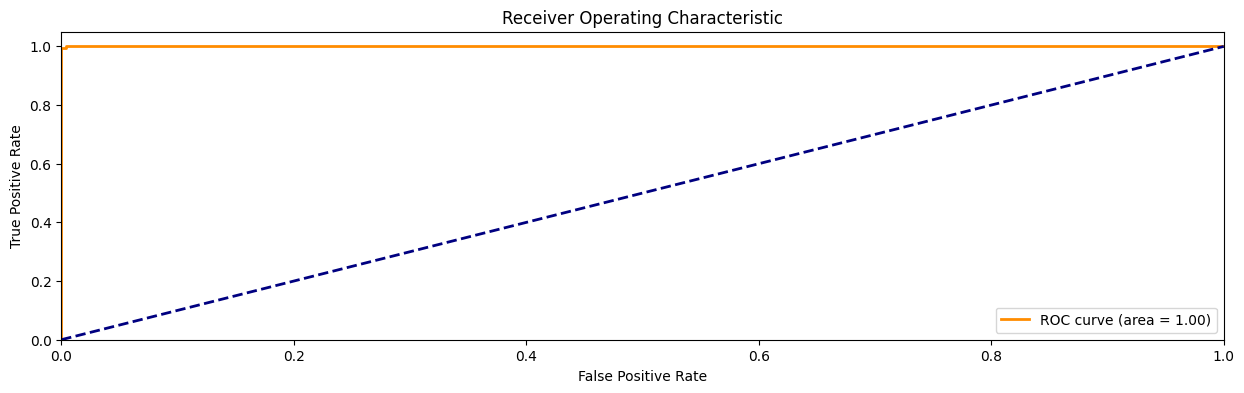

In [73]:
from sklearn.metrics import roc_curve, auc

y_score = xgb_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


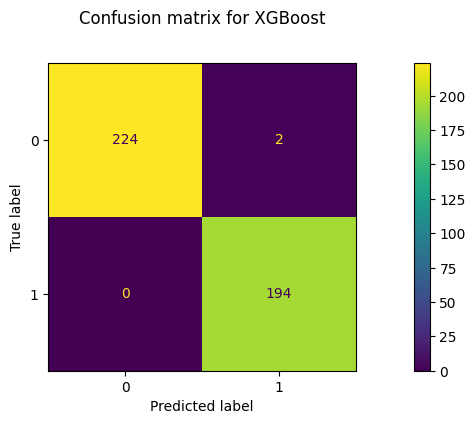

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = xgb_clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for XGBoost', y=1.1)
plt.show()

In [75]:
# Dumping XGBoost Classifier
joblib.dump(xgb_clf, 'xgb_clf.pkl')

['xgb_clf.pkl']

# Comparision Table

In [76]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'RF':[accuracy_score(y_test, predRFC), f1_score(y_test, predRFC), recall_score(y_test, predRFC), precision_score(y_test, predRFC), r2_score(y_test, predRFC)],
        'LR':[accuracy_score(y_test, predlog), f1_score(y_test, predlog), recall_score(y_test, predlog), precision_score(y_test, predlog), r2_score(y_test, predlog)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'NB':[accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb), r2_score(y_test, predgnb)],
        'KNN':[accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN), r2_score(y_test, predKNN)],
        'XGB':[accuracy_score(y_test, predXGB), f1_score(y_test, predXGB), recall_score(y_test, predXGB), precision_score(y_test, predXGB), r2_score(y_test, predXGB)]
}
chart = pd.DataFrame(chart)

In [77]:
display(chart)

,Metric,DT,RF,LR,SVM,NB,KNN,XGB
0,Accuracy,0.976190,0.988095,0.780952,0.995238,0.952381,0.990476,0.995238
1,F1-Score,0.973822,0.987277,0.732558,0.994845,0.948187,0.989744,0.994872
2,Recall,0.958763,1.000000,0.649485,0.994845,0.943299,0.994845,1.000000
3,Precision,0.989362,0.974874,0.840000,0.994845,0.953125,0.984694,0.989796
4,R2-Score,0.904206,0.952103,0.118694,0.980841,0.808412,0.961682,0.980841


c:\Users\USER\Documents\Parkinson-s-DiseaseML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


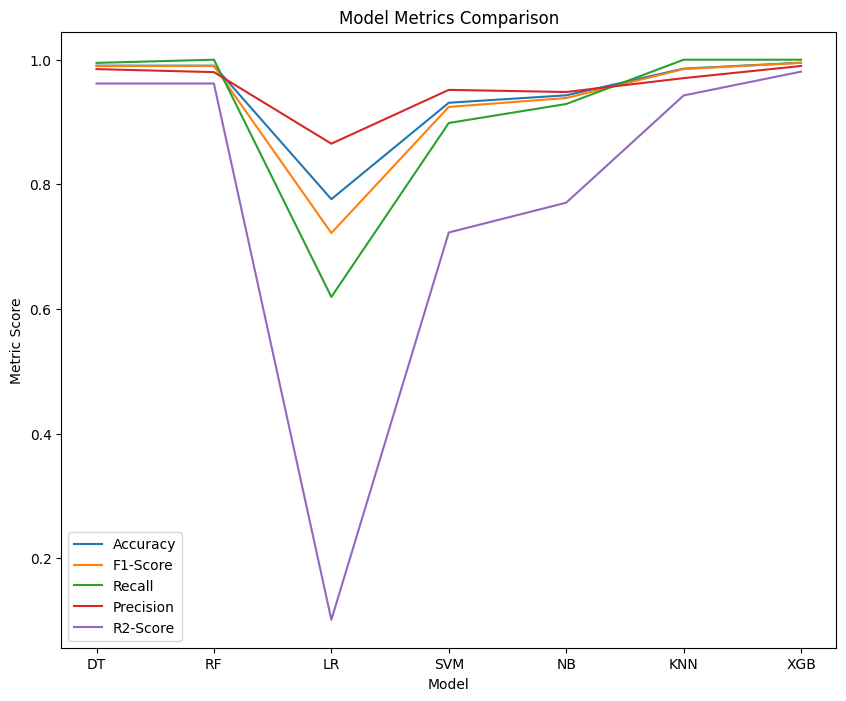

,Metric,DT,RF,LR,SVM,NB,KNN,XGB
0,Accuracy,0.990476,0.990476,0.776190,0.930952,0.942857,0.985714,0.995238
1,F1-Score,0.989899,0.989950,0.721893,0.924282,0.938462,0.985000,0.994949
2,Recall,0.994924,1.000000,0.619289,0.898477,0.928934,1.000000,1.000000
3,Precision,0.984925,0.980100,0.865248,0.951613,0.948187,0.970443,0.989950
4,R2-Score,0.961758,0.961758,0.101318,0.722747,0.770549,0.942637,0.980879


Best Model: XGB for this project


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Define the models
models = {
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'LR': LogisticRegression(),
    'SVM': SVC(),
    'NB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'XGB': XGBClassifier()
}

# Train the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store model names and their metrics
model_names = []
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []
r2_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_names.append(name)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Plotting the metrics
plt.figure(figsize=(10, 8))
plt.plot(model_names, accuracy_scores, label='Accuracy')
plt.plot(model_names, f1_scores, label='F1-Score')
plt.plot(model_names, recall_scores, label='Recall')
plt.plot(model_names, precision_scores, label='Precision')
plt.plot(model_names, r2_scores, label='R2-Score')
plt.xlabel('Model')
plt.ylabel('Metric Score')
plt.title('Model Metrics Comparison')
plt.legend()
plt.show()

# Create a chart to compare the models
chart = {
    'Metric': ["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
    'DT': [accuracy_score(y_test, models['DT'].predict(X_test)), 
           f1_score(y_test, models['DT'].predict(X_test)), 
           recall_score(y_test, models['DT'].predict(X_test)), 
           precision_score(y_test, models['DT'].predict(X_test)), 
           r2_score(y_test, models['DT'].predict(X_test))],
    'RF': [accuracy_score(y_test, models['RF'].predict(X_test)), 
           f1_score(y_test, models['RF'].predict(X_test)), 
           recall_score(y_test, models['RF'].predict(X_test)), 
           precision_score(y_test, models['RF'].predict(X_test)), 
           r2_score(y_test, models['RF'].predict(X_test))],
    'LR': [accuracy_score(y_test, models['LR'].predict(X_test)), 
           f1_score(y_test, models['LR'].predict(X_test)), 
           recall_score(y_test, models['LR'].predict(X_test)), 
           precision_score(y_test, models['LR'].predict(X_test)), 
           r2_score(y_test, models['LR'].predict(X_test))],
    'SVM': [accuracy_score(y_test, models['SVM'].predict(X_test)), 
            f1_score(y_test, models['SVM'].predict(X_test)), 
            recall_score(y_test, models['SVM'].predict(X_test)), 
            precision_score(y_test, models['SVM'].predict(X_test)), 
            r2_score(y_test, models['SVM'].predict(X_test))],
    'NB': [accuracy_score(y_test, models['NB'].predict(X_test)), 
           f1_score(y_test, models['NB'].predict(X_test)), 
           recall_score(y_test, models['NB'].predict(X_test)), 
           precision_score(y_test, models['NB'].predict(X_test)), 
           r2_score(y_test, models['NB'].predict(X_test))],
    'KNN': [accuracy_score(y_test, models['KNN'].predict(X_test)), 
            f1_score(y_test, models['KNN'].predict(X_test)), 
            recall_score(y_test, models['KNN'].predict(X_test)), 
            precision_score(y_test, models['KNN'].predict(X_test)), 
            r2_score(y_test, models['KNN'].predict(X_test))],
    'XGB': [accuracy_score(y_test, models['XGB'].predict(X_test)), 
            f1_score(y_test, models['XGB'].predict(X_test)), 
            recall_score(y_test, models['XGB'].predict(X_test)), 
            precision_score(y_test, models['XGB'].predict(X_test)), 
            r2_score(y_test, models['XGB'].predict(X_test))]
}

chart = pd.DataFrame(chart)
display(chart)

# Determine the best model based on the highest accuracy
best_model = max(models, key=lambda x: accuracy_score(y_test, models[x].predict(X_test)))
print(f"Best Model: {best_model} for this project")



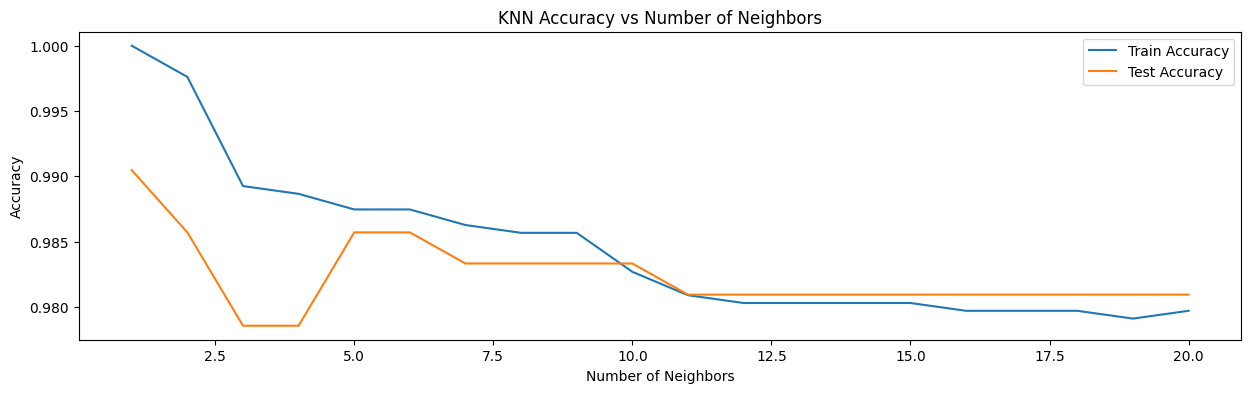

In [87]:
import matplotlib.pyplot as plt

neighbors = range(1, 21)
train_accuracy = []
test_accuracy = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.legend()
plt.show()



Text(0, 0.5, 'Second principal component')

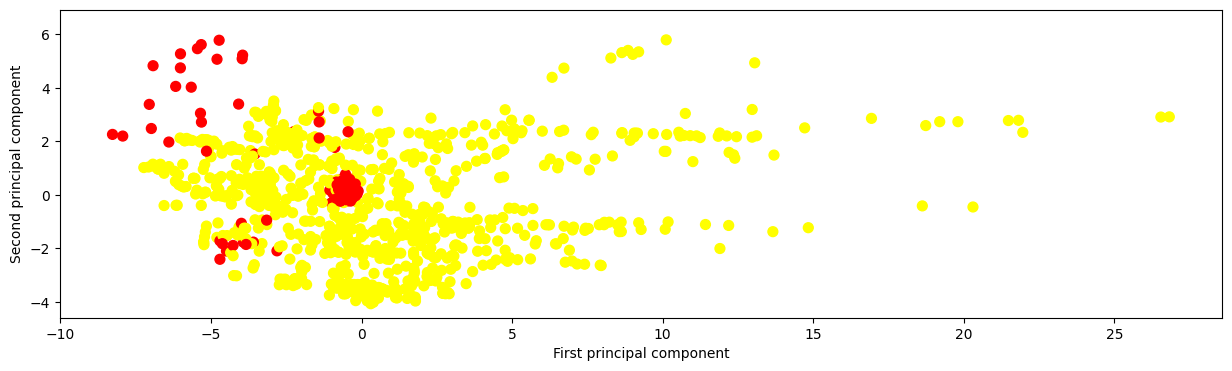

In [88]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with a standard scaler and an SVM classifier
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Fit the model
svm.fit(X_train, y_train)

# Create a PCA model
pca = make_pipeline(StandardScaler(), PCA(n_components=2))

# Fit the PCA model
pca.fit(X_train)

# Transform the data
X_pca = pca.transform(X_train)

# Plot the support vectors
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(svm.named_steps['svc'].support_vectors_[:, 0],
            svm.named_steps['svc'].support_vectors_[:, 1],
            s=200, facecolors='none');
plt.xlabel('First principal component')
plt.ylabel('Second principal component')


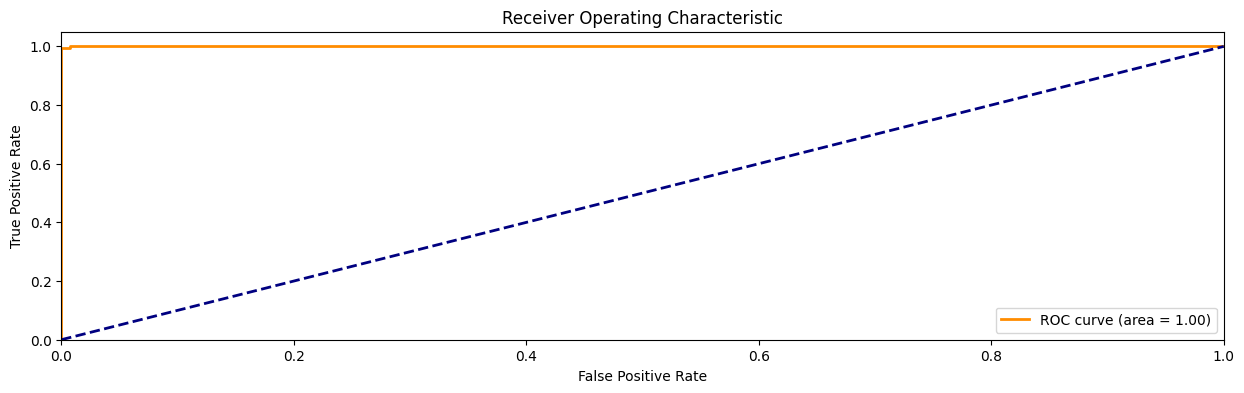

In [89]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Get the predicted probabilities
y_score = xgb.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


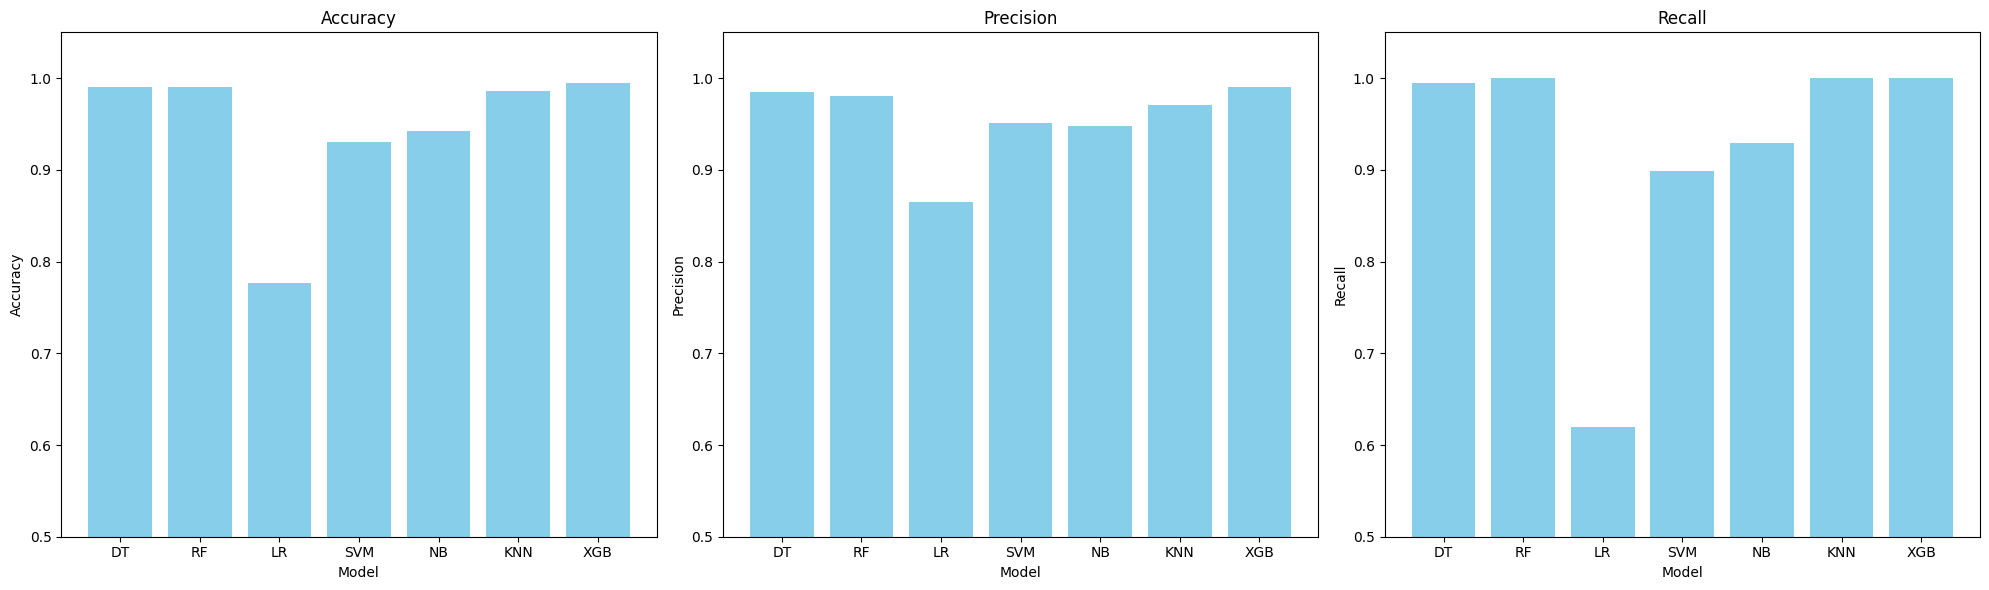

In [93]:
import matplotlib.pyplot as plt

# Define the data
models = ['DT', 'RF', 'LR', 'SVM', 'NB', 'KNN', 'XGB']
metrics = ['Accuracy', 'Precision', 'Recall']
data = {
    'Accuracy': [0.990476, 0.990476, 0.776190, 0.930952, 0.942857, 0.985714, 0.995238],
    'Precision': [0.984925, 0.980100, 0.865248, 0.951613, 0.948187, 0.970443, 0.989950],
    'Recall': [0.994924, 1.000000, 0.619289, 0.898477, 0.928934, 1.000000, 1.000000]
}

# Create the figure and axis
fig, axs = plt.subplots(1, len(metrics), figsize=(20, 6))

# Plot the metrics
for i, metric in enumerate(metrics):
    axs[i].bar(models, data[metric], color='skyblue')
    axs[i].set_title(metric)
    axs[i].set_xlabel('Model')
    axs[i].set_ylabel(metric)
    axs[i].set_ylim(0.5, 1.05)  # Adjust y-axis limits for better visibility

# Show the plot
plt.tight_layout()
plt.show()

